# Machine Learning Master Notes 17 - Logistics Regression and Regularization

### Prepare Environment

In [1]:
%matplotlib inline

# Essential libraries
import numpy as np
import pandas as pd
import math
import scipy
import random
import datetime
from datetime import datetime

# Graphical Component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

## SciKit Learning Preprocessing 
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## SciKit Learn Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## SciKit Learn ML Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## SciKit Learn Dataset
import sklearn.datasets as skdata
from sklearn.datasets import make_blobs, make_classification, make_circles, make_gaussian_quantiles

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV1 as my
import testFile as test


### Preparation of Sample Data

#### Example 1

In [2]:
df1 = pd.read_csv('./data/logisticsSample2.txt', header=None)
df1.columns = ['x0','x1','y']
df1.head()

,x0,x1,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


**We will reduce the sample size for faster computation.**

In [3]:
X1_sample = df1.sample(n = 40, random_state=133)

In [4]:
X1_train = X1_sample[['x0','x1']]
X1_train.head()

,x0,x1
11,0.52938,-0.521200
27,0.67339,-0.535820
53,-0.20795,0.355990
97,0.39689,0.823830
43,0.46025,0.012427


In [5]:
y1_train = X1_sample[['y']]
y1_train.head()

,y
11,1
27,1
53,1
97,0
43,1


In [6]:
X1_train = X1_train.to_numpy()
y1_train = y1_train.to_numpy()

In [7]:
X1_train_positive = X1_train[y1_train.flatten() == 1]
X1_train_negative = X1_train[y1_train.flatten() == 0]

In [8]:
X1_train_positive[:5]

array([[ 0.52938 , -0.5212  ],
       [ 0.67339 , -0.53582 ],
       [-0.20795 ,  0.35599 ],
       [ 0.46025 ,  0.012427],
       [ 0.73675 , -0.18494 ]])

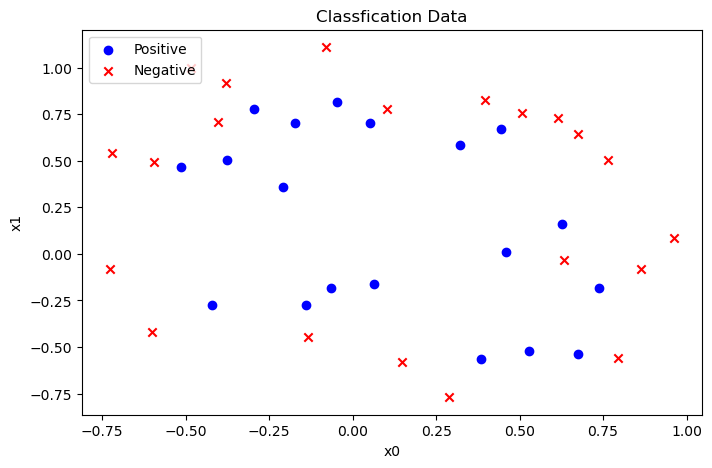

In [9]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_train_positive[:,0], X1_train_positive[:,1], marker='o', c='b', label="Positive")
ax1.scatter(X1_train_negative[:,0], X1_train_negative[:,1], marker='x', c='r', label="Negative")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

#### Example 2

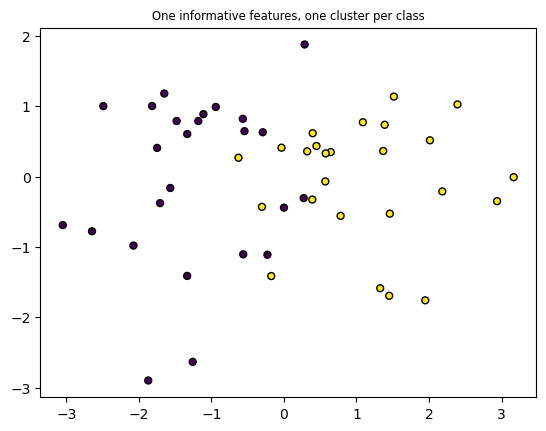

In [10]:
plt.title("One informative features, one cluster per class", fontsize="small")
X2, Y2 = make_classification(n_samples=50, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=197)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")
plt.show()

#### Example 3: School Exam and Admission Dataset

The following dataset contains 2 exam score from student and the result of admission to the school. We can use the dataset to build a Logistics Regression model to predict students admission to the school based on their exam score.

In [11]:
df3 = pd.read_csv('./data/exam_score_data1.txt')
df3.head()

,Exam1,Exam2,schoolAdmission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [12]:
X3_train = df3[['Exam1','Exam2']]
X3_train.head()

,Exam1,Exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [13]:
X3_train.shape

(100, 2)

In [14]:
y3_train = df3[['schoolAdmission']]
y3_train.head()

,schoolAdmission
0,0
1,0
2,0
3,1
4,1


In [15]:
y3_train.shape

(100, 1)

In [16]:
X3_train = X3_train.to_numpy()
y3_train = y3_train.to_numpy()

In [17]:
X3_train_admitted = X3_train[y3_train.flatten() == 1]
X3_train_admitted.shape

(60, 2)

In [18]:
X3_train_NotAdmitted = X3_train[y3_train.flatten() == 0]
X3_train_NotAdmitted.shape

(40, 2)

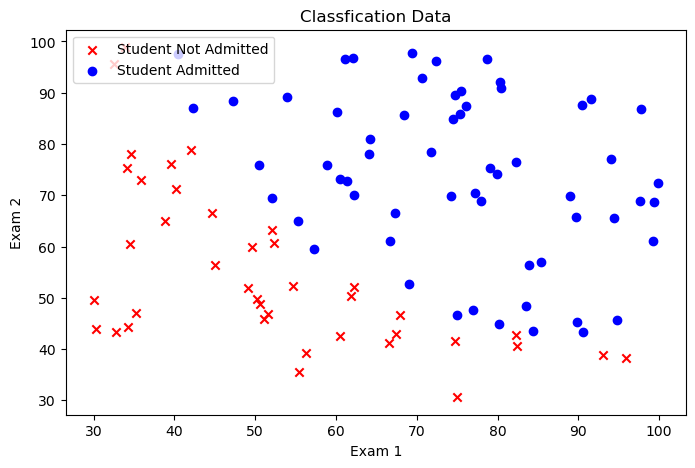

In [19]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3_train_NotAdmitted[:,0], X3_train_NotAdmitted[:,1], marker='x', c='r', label="Student Not Admitted")
ax1.scatter(X3_train_admitted[:,0], X3_train_admitted[:,1], marker='o', c='b', label="Student Admitted")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Exam 1')
ax1.set_ylabel('Exam 2')
ax1.legend(loc="upper left")
plt.show()

## Addressing Overfitting and Underfitting Problem

To address overfitting the solution are as below:
    
- **Collect more data**
- **Another method is to use less features by reducing the number of features especially polynomial features. If our model still overfit, then we may consider reducing the number of features we have. We can choose only few of the most relevant features.**
- **The third method is to use <u>Regularization</u>. This is a technique that will reduce the weights of features/parameters so that it is too small (such as 0.00001) to be significantly meaningful while we can still keep these features.**

To address underfitting the solution are as below:

- **We need to redo feature selection and select the features that are most relevant to the outcome.**
- **We can also increase the complexity of the features by performing feature engineering and increase its polynomial complexity.** 
- **Collect more data**
- **Select model that are capable of detecting complex relationship.**
- **Increase the number of iterations and use learning curve to check for convergence.**
- **We might need to tune back regularization a bit if such technique has been applied too aggressively.**

## Logistics Regression with Regularization

Hypothesis: $$z = f(x)$$
$$g(z) = \frac{1}{1+e^{-(z)}}$$
$$g(f(x)) = \frac{1}{1+e^{-(f(x))}}$$

Cost Function: $$J(w,b) = -\frac{1}{m} \sum_{m=1}^{m} {ylog(g(z)) + ((1-y)log(1-g(z))}$$ 
$$J(w,b) = -\frac{1}{m} \sum_{m=1}^{m} {ylog(g(f(x))) + ((1-y)log(1-g(f(x)))}$$ 
$$$$
Cost Function with **Regularization**: 
<font color='red'>
$$J(w,b) = -\frac{1}{m} \sum_{m=1}^{m} {ylog(g(f(x))) + ((1-y)log(1-g(f(x)))} + \frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$ 

**Cost Function Regularization Term:**
<font color='red'>
$$\frac {\lambda}{2m} \sum\limits_{j=1}^{n} w^{2}_{j}$$

$$$$    
Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec w &= \vec w -  \alpha \frac{\partial J(\vec{w},b)}{\partial \vec{w}}  \; \newline 
 b &= b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives with **NO** regularization: $$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial \vec{w}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)})\vec{X}^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)}) \\
\end{align}
$$

Implementation of Gradient Descent with **NO** regularization:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w} -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$


<font color='blue'>
    
**Full Implementation of Gradient Descent with Regularization:**
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w}  -  \alpha \left[ \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  + \frac{\lambda}{m} \vec{w} \right] \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

$$$$
<font color='blue'>
**Gradient Descent Regularization Term:** $$\frac {\lambda}{m} \vec{w}$$
</font>


**Please note that the gradient descent is basically the same, we can use the same function for gradient descent as long as we can specify which cost function and which compute gradient function.**

## Logistic Regression Function

#### Additional Linear Regression Function

In [20]:
# Cost Function
def cost_function(X,y,coefficient,intercept,reguLambda=0):
    '''
    Actual cost function for both single and multiple features
    X = matrix of training data, each training examples in rows (m) and features in column (n), 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    coefficient (w) = n by 1 vector, where n is total number of features
    intercept (b) = scalar
    reguLambda = default is 0, no regularization, please enter appropriate lambda value for regularization

    Return:
    Cost (scalar)
    '''

    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    m = X.shape[0]

    # Compute Normal Cost Function
    fx = (X@coefficient) + intercept
    lossFunction = (fx - y) ** 2
    RSS = lossFunction.sum()
    cost = (1 / (2 * m)) * RSS

    # Compute Regularization Term
    # lambda/2m * sum(w^2)
    regu = (reguLambda/ (2*m)) * sum(coefficient ** 2)

    totalCost = cost + regu[0]
    
    return totalCost


# Compute Gradient
def compute_gradient(X, y, coefficient, intercept=0., reguLambda=0.):
    '''
    Compute gradient for each step size
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    w = n by 1 vector, where n is total number of features
    b = scalar (default = 0)
    reguLambda = scalar (default = 0), no regularization if default. Please enter appropriate lambda value for regularization.

    Return:
    db (scalar)
    dw (n by 1 vector)
    '''
    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    # total number of features and training examples
    m,n = X.shape

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Matrix computation
    fx = ((X@coefficient) + intercept)
    temp_dw = (fx - y) * X
    temp_db = (fx - y)
    
    db = temp_db.mean() 
    dw = temp_dw.mean(axis=0).reshape((n,1)) 

    # Compute Regularization Term
    regu = coefficient * (reguLambda/m) 

    dwRegu = dw + regu

    return db, dwRegu

### Logistics Function

In [21]:
def sigmoid(z):
    '''
    Sigmoid Function
    z = f(x) a matrix of m by 1, each training examples in rows (m) and fx in 1 column, 

    Return:
    Sigmoid (scalar)
    '''

    # there will be overflow error if we have data that is less than -709
    # to overcome this error we use np.clip to limit the data range from -700 to 700
    # The result will still be between 0 to 1
    z = np.clip(z, -700, 700)
    #print(z)
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

In [22]:
def compute_logistic_cost(X, y, coefficient, intercept, reguLambda = 0):
    '''
    Logistics cost function for both single and multiple features
    X = matrix of training data, each training examples in rows (m) and features in column (n), 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    coefficient (w) = n by 1 vector, where n is total number of features
    intercept (b) = scalar
    reguLambda = default is 0, no regularization, please enter appropriate lambda value for regularization

    Return:
    Cost (scalar)
    '''

    ### the following section convert 1d array to 2d array for ease of computation ###
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()
        
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)


    m,n = X.shape


    z = np.matmul(X,coefficient) + intercept
    sig = sigmoid(z)
    cost = - (y * np.log(sig + 1e-20) + (1-y)*np.log(1-sig + 1e-20)).mean()
    
    # lambda/2m * sum(w^2)
    regu_cost = (reguLambda/(2 * m)) * (coefficient**2).sum() 
    
    return cost + regu_cost

In [23]:
def compute_logistic_gradient(X, y, coefficient, intercept, reguLambda=0.):
    '''
    Compute gradient for each step size
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    w = n by 1 vector, where n is total number of features
    b = scalar (default = 0)
    reguLambda = scalar (default = 0), no regularization if default. Please enter appropriate lambda value for regularization.

    Return:
    db (scalar)
    dw (n by 1 vector)
    '''
    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)

    ### The following will check if the size match
    if X.shape[0] != y.shape[0]:
        print('Error, the size of X and y does not match!')
        return 
    
    if coefficient.shape[0] != X.shape[1]:
        print('Error, the size of X features does not match with size of w (coefficient)!')
        print(coefficient.shape)
        print(X.shape[1])
        return
    
    # total number of features and training examples
    m,n = X.shape

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Compute Sigmoid 
    fx = ((X@coefficient) + intercept)
    sig = sigmoid(fx)

    temp_dw = (sig - y) * X
    temp_db = (sig - y)
    
    db = temp_db.mean() 
    dw = temp_dw.mean(axis=0).reshape(-1,1) #.mean() function return a 1 d array

    # Compute Regularization Term
    regu = coefficient * (reguLambda/m) 

    dwRegu = dw + regu

    return db, dwRegu

In [24]:
# Run Gradient Descent  
def compute_gradient_descent(X, y, gradient_function = compute_gradient, cost_function = cost_function, init_coefficient = None, 
                             init_intercept=0., iterations=10000, alpha=0.01, reguLambda = 0., 
                             printProgress=False, printProgressRate = 1000, storeHistory=False):
    '''
    Runs Gradient Descent

    Compulsory Input
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    
    Optional Input with Defauls
    gradient_function = enter name of function that compute Logistic gradient (default is compute_gradient which is meant for Linear Regression)
    cost_function = enter name of function that compute Logistic cost (default is cost_function which is meant for Linear Regression)
    init_coefficient = initial w value (type: n by 1 vector, where n is total number of features) (default:None)
    init_intercept = initial b value (type: scalar) (default:0.)
    iterations = total number of runs for the gradient descent (default: 10,000)
    alpha = learning rate / step size (default:0.01)
    reguLambda = regularization control parameter, lambda (default:0.)

    Print Progress Options
    printProgress = To print the details while running gradient descent (type:Boolean) (default: False)
    printProgressRate = To print the details every n iterations (default:1000)
    storeHistory = To record all coefficient and intercept history (default:False) [Please note that if turn on, this may slow down the process] 

    Return:
    w = best w (n by 1 vector, where n is total number of features)
    b = best b (scalar)
    cost_history = Computed cost for each iterations (list)
    w_history = Computed w for each iterations (list)
    b_history = Computed g for each iterations (list)
    '''

    #### The following check for different data types and convert them to Numpy
    #### Also convert Pandas Series and DataFrame to Numpy
    #### Also convert 1D array to Numpy
    
    ### the following check if data type is Series
    if isinstance(X, pd.Series):
        #print('convert to numpy')
        X = X.to_frame()
    if isinstance(y, pd.Series):
        y = y.to_frame()
    
    ### the following check if data type is dataframe
    if isinstance(X, pd.DataFrame):
        #print('convert to numpy')
        X = X.to_numpy()
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(len(X),1)
    if y.ndim == 1:
        y = y.reshape(len(y),1)


    ### Check for init_coefficient separately as the dimension of w depends on X
    ### Also perform copy to avoid changing the original array

    if init_coefficient is None:
        init_coefficient = np.zeros([X.shape[1],1])

    if isinstance(init_coefficient, pd.Series):
        init_coefficient = init_coefficient.copy().to_frame()

    if isinstance(init_coefficient, pd.DataFrame):
        init_coefficient = init_coefficient.copy().to_numpy()

    if init_coefficient.ndim == 1:
        init_coefficient = init_coefficient.copy()
        init_coefficient = init_coefficient.reshape(-1,1)
    
    ### The following will check if the size match
    if X.shape[0] != y.shape[0]:
        print('Error, the size of X and y does not match!')
        return 
    
    if init_coefficient.shape[0] != X.shape[1]:
        print('Error, the size of X features does not match with size of w (coefficient)!')
        print('coefficient:',init_coefficient.shape)
        print('X Features:',X.shape[1])
        return

    # Initialization of variables
    m,n = X.shape
    
    db = 0
    dw = 0

    b = init_intercept
    w = init_coefficient
    
    cost_history = []
    w_history = np.zeros((1,n))
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dw = gradient_function(X,y,w,b,reguLambda)

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function(X,y,w,b,reguLambda)

        # Reshape w for printing and storing history
        w_convert = w.copy()
        w_convert = np.transpose(w_convert)
        
        if storeHistory == True: 
            cost_history.append(cost)
            b_history.append(b)
            w_history = np.vstack((w_history,w_convert))

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: cost = {cost:.4e}: intercept = {b:.4e}: weights = {w_convert}")


    print(f"iteration {j}: cost = {cost:.4e}: intercept = {b:.4e}: weights = {w_convert.flatten()}")    
    print('best w', np.round(w.flatten(),4))
    print('best b', np.round(b,4)) 

    return w, b, cost_history, w_history[1:], b_history

In [25]:
def predict_logistic(X, coefficient, intercept, prob=False):
    '''
    Make Logictic prediction

    INPUT:
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    coefficient = The trained coefficient/weights 
    intercept = The intercept
    prob = return probability instead of True/False (default: False)

    RETURN:
    (If proba = False ) y_predict = True or False if prediction over 0.5
    (If proba = True) proba = the probability of teh prediction.
    '''
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    if X.ndim == 1:
        X = X.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    z = np.matmul(X,coefficient) + intercept
    #print(z)
    
    proba = sigmoid(z)
    #print(proba)
    
    y_predict = proba>=0.5
    y_predict = y_predict.astype(int)
    if prob == False:
        return y_predict
    elif prob == True:
        return proba

### Testing Logistics Regression

In [26]:
sigmoid(np.array([-1, 0, 1, 2]))

array([0.26894142, 0.5       , 0.73105858, 0.88079708])

<details>
<summary>
    <b>Expected Output<b>
</summary>
<b>sigmoid([-1, 0, 1, 2])</b>
        
[0.26894142,        0.5,           0.73105858,        0.88079708]

In [27]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_logistic_cost(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


<details>
<summary>
    <b>Expected Answer<b>
</summary>

        
0.3668667864055175

In [28]:
w_array1 = np.array([1,1]).reshape(-1,1)
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_logistic_cost(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_logistic_cost(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.503680863674846


<details>
<summary>
    <b>Expected Answer<b>
</summary>

Cost for b = -3 :  0.3668667864055175

Cost for b = -4 :  0.5036808636748461

In [29]:
m,n = X3_train.shape
initial_w = np.zeros(2)
initial_b = 0.
print(compute_logistic_cost(X3_train, y3_train, initial_w, initial_b))

0.6931471805599453


<details>
<summary>
    <b>Expected Answer<b>
</summary>

        
<b>Cost at initial w (zeros)</b>
0.693

In [30]:
test_w = np.array([0.2, 0.2])
test_b = -24.
print(compute_logistic_cost(X3_train, y3_train, test_w, test_b))

0.21833019382659782


<details>
<summary>
    <b>Expected Answer<b>
</summary>

        
<b>Cost at test w,b</b>
0.218

In [31]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_logistic_gradient(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [[0.498333393278696], [0.49883942983996693]]


<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

In [32]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_logistic_gradient(X3_train, y3_train, initial_w, initial_b,)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[[-12.009216589291151], [-11.262842205513596]]


<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
dj_db at initial w (zeros):
-0.1 
dj_dw at initial w (zeros):
[-12.00921658929115, -11.262842205513591]
```

In [33]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_logistic_gradient(X3_train, y3_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())


dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [[-44.831353617873795], [-44.37384124953977]]


<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
dj_db at initial w (zeros):
-0.5999999999991071

dj_dw at initial w (zeros):
[-44.8313536178737957, -44.37384124953978]
```

In [34]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
w_out, b_out, _, _, _ = compute_gradient_descent(X_train, y_train, iterations=10000, alpha=0.1, gradient_function=compute_logistic_gradient, 
                                                      cost_function=compute_logistic_cost,printProgress=True) 

iteration 0: cost = 6.8461e-01: intercept = 0.0000e+00: weights = [[0.025      0.01666667]]
iteration 1000: cost = 1.5910e-01: intercept = -5.9110e+00: weights = [[2.30572624 2.07740353]]
iteration 2000: cost = 8.4601e-02: intercept = -8.3115e+00: weights = [[3.15508984 2.94023038]]
iteration 3000: cost = 5.7053e-02: intercept = -9.7823e+00: weights = [[3.68092411 3.47097047]]
iteration 4000: cost = 4.2908e-02: intercept = -1.0839e+01: weights = [[4.06024975 3.8527842 ]]
iteration 5000: cost = 3.4338e-02: intercept = -1.1662e+01: weights = [[4.35647898 4.15050189]]
iteration 6000: cost = 2.8604e-02: intercept = -1.2335e+01: weights = [[4.59929949 4.39430614]]
iteration 7000: cost = 2.4502e-02: intercept = -1.2905e+01: weights = [[4.80494417 4.6006459 ]]
iteration 8000: cost = 2.1424e-02: intercept = -1.3398e+01: weights = [[4.98324047 4.77945746]]
iteration 9000: cost = 1.9030e-02: intercept = -1.3834e+01: weights = [[5.14058319 4.93719618]]
iteration 9999: cost = 1.7118e-02: intercept

<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
- iterations = 10000
- alpha=0.1

updated parameters: 

w:[5.28 5.08], b:-14.222409982019837
```

In [35]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8
iterations = 10000
alpha = 0.001

coef, intercept, _, _, _ = compute_gradient_descent(X3_train, y3_train, gradient_function=compute_logistic_gradient, 
                                                       cost_function = compute_logistic_cost, init_intercept=initial_b, init_coefficient=intial_w, 
                                                       iterations=iterations, alpha=alpha, printProgress=True) 

iteration 0: cost = 9.6379e-01: intercept = -7.9994e+00: weights = [[0.04397755 0.04655245]]
iteration 1000: cost = 3.0509e-01: intercept = -8.0184e+00: weights = [[0.06992517 0.0634808 ]]
iteration 2000: cost = 3.0472e-01: intercept = -8.0375e+00: weights = [[0.07007465 0.06363254]]
iteration 3000: cost = 3.0436e-01: intercept = -8.0566e+00: weights = [[0.07022366 0.06378378]]
iteration 4000: cost = 3.0400e-01: intercept = -8.0757e+00: weights = [[0.07037219 0.06393454]]
iteration 5000: cost = 3.0363e-01: intercept = -8.0947e+00: weights = [[0.07052026 0.06408482]]
iteration 6000: cost = 3.0328e-01: intercept = -8.1136e+00: weights = [[0.07066786 0.06423461]]
iteration 7000: cost = 3.0292e-01: intercept = -8.1324e+00: weights = [[0.07081501 0.06438392]]
iteration 8000: cost = 3.0257e-01: intercept = -8.1512e+00: weights = [[0.07096169 0.06453276]]
iteration 9000: cost = 3.0222e-01: intercept = -8.1700e+00: weights = [[0.07110792 0.06468113]]
iteration 9999: cost = 3.0187e-01: intercep

<details>
<summary>
    <b>Expected Output: Cost     0.30, (Click to see details):</b>
</summary>

    # With the following settings
    np.random.seed(1)
    intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
```

In [36]:
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5
tmp_p = predict_logistic(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value  {tmp_p.flatten()}')

Output of predict: shape (4, 1), value  [0 1 1 1]


<details>
<summary>
    <b>Expected Answer<b>
</summary>
        
```
Output of predict: shape (4,):
value [0. 1. 1. 1.]
```

In [37]:
#Compute accuracy on our training set
myp = predict_logistic(X3_train, coef, intercept)
print('Train Accuracy: %f'%(np.mean(myp == np.array(y3_train)) * 100))

Train Accuracy: 92.000000


<details>
<summary>
    <b>Train Accuracy (approx):</b>
</summary>

92.00


In [38]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_logistic_cost(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


<details>
<summary>
    <b>Regularized cost:</b>
</summary>

0.6850849138741673

In [39]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_logistic_gradient(X_tmp, y_tmp, w_tmp,b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [[0.17380012933994293], [0.32007507881566943], [0.10776313396851499]]


<details>
<summary>
    <b>Expected Output:</b>
</summary>

```
dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
 ```

### Testing Gradient Descent with Example 1

In [40]:
X1_train = df1[['x0','x1']]
y1_train = df1[['y']]

In [41]:
X1_train = X1_train.to_numpy()
y1_train = y1_train.to_numpy()

In [42]:
X1_train[:5]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

In [43]:
X1_train_positive = X1_train[y1_train.flatten() == 1]
X1_train_negative = X1_train[y1_train.flatten() == 0]

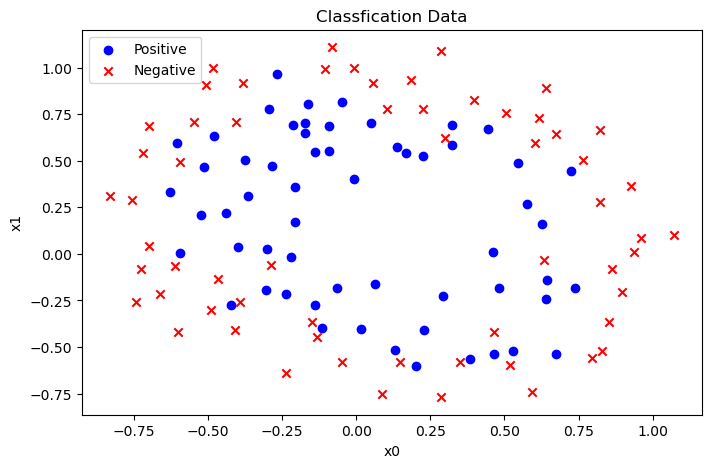

In [44]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_train_positive[:,0], X1_train_positive[:,1], marker='o', c='b', label="Positive")
ax1.scatter(X1_train_negative[:,0], X1_train_negative[:,1], marker='x', c='r', label="Negative")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

In [45]:
polynomial_features= PolynomialFeatures(degree=6,include_bias=False)
X1_poly = polynomial_features.fit_transform(X1_train)

In [46]:
X1_poly[0]

array([5.12670000e-02, 6.99560000e-01, 2.62830529e-03, 3.58643425e-02,
       4.89384194e-01, 1.34745327e-04, 1.83865725e-03, 2.50892595e-02,
       3.42353606e-01, 6.90798869e-06, 9.42624411e-05, 1.28625106e-03,
       1.75514423e-02, 2.39496889e-01, 3.54151856e-07, 4.83255257e-06,
       6.59422333e-05, 8.99809795e-04, 1.22782870e-02, 1.67542444e-01,
       1.81563032e-08, 2.47750473e-07, 3.38066048e-06, 4.61305487e-05,
       6.29470940e-04, 8.58939846e-03, 1.17205992e-01])

In [47]:
X1_poly.shape

(118, 27)

In [48]:
np.random.seed(1)
initial_w = np.random.rand(X1_poly.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_logistic_cost(X1_poly, y1_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6618252552483951


<details>
<summary>
    <b>Expected Cost:</b>
</summary>

```
Regularized cost : 0.6618252552483948
```


In [49]:
np.random.seed(1) 
initial_w  = np.random.rand(X1_poly.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_logistic_gradient(X1_poly, y1_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.07138288792343654
First few elements of regularized dj_dw:
 [[-0.010386028450548701], [0.011409852883280122], [0.0536273463274574], [0.0031402782673134637]]


<details>
<summary>
    <b>Expected Output:</b>
</summary>

```
dj_db: 0.07138288792343656 
First few elements of regularized dj_dw:
[[-0.010386028450548701], [0.01140985288328012], [0.0536273463274574], [0.003140278267313462]] 
```

In [50]:
np.random.seed(1)
initial_w = np.random.rand(X1_poly.shape[1])-0.5
initial_b = 1.
# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w, b, _, _, _ = compute_gradient_descent(X1_poly, y1_train, gradient_function=compute_logistic_gradient, cost_function = compute_logistic_cost, 
                                         init_intercept=initial_b, init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                         printProgress=True, reguLambda=lambda_)

iteration 0: cost = 7.2102e-01: intercept = 9.9814e-01: weights = [[-0.08296861  0.22001305 -0.5007296  -0.19768319 -0.35410957 -0.4077798
  -0.31386594 -0.15448797 -0.10367237  0.03830074 -0.08079774  0.18501758
  -0.29552993  0.37748219 -0.47278022  0.17040602 -0.08272042  0.05860296
  -0.35963546 -0.30234919  0.3003824   0.46826303 -0.18666215  0.19233028
   0.37628459  0.39462359 -0.41549368]]
iteration 1000: cost = 5.8746e-01: intercept = 5.4179e-01: weights = [[ 0.05198462  0.31242045 -0.96144029 -0.24505427 -0.69520751 -0.40609249
  -0.37502888 -0.18128275 -0.22171797 -0.27233099 -0.07631237  0.07067083
  -0.29568889  0.0925179  -0.53678658  0.13376217 -0.09122447  0.01155252
  -0.38016697 -0.47488932  0.0779514   0.47205391 -0.23976306  0.19828954
   0.31598795  0.3984572  -0.66445585]]
iteration 2000: cost = 5.5715e-01: intercept = 6.5492e-01: weights = [[ 0.20480581  0.51843012 -1.2359032  -0.31975629 -0.8308961  -0.36418633
  -0.41383578 -0.20625959 -0.22791016 -0.4780916  -

<details>
<summary>
    <b>Expected Output: Cost < 0.5  (Click for details)</b>
</summary>

```
# Using the following settings
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45       
    
```

In [51]:
#Compute accuracy on our training set
y_pre = predict_logistic(X1_poly, w, b)
print('Train Accuracy: %f'%(np.mean(y_pre == np.array(y1_train)) * 100))

Train Accuracy: 82.203390


<details>
<summary>
    <b>Expected Output:</b>
</summary>

```
Train Accuracy: ~ 80%
```

## SciKit Learn Logistics Regression and Regularization

In SciKit Learn, `LogisticsRegression()` has a default L2 penalty. However, we can change to L1 penalty or no penalty depending on our needs. Please note that different solver supports different type of penalty. Please refer to the table below. Please also be aware that SciKit Learn will change their supports on different solvers and penalty. Please consult the official documentation for the most updated information.

|Solver|Supported Penalty|
|---|---|
|‘lbfgs’|‘l2’, None|
|‘liblinear’|‘l1’, ‘l2’|
|‘newton-cg’|‘l2’, None|
|‘newton-cholesky’|‘l2’, None|
|‘sag’|‘l2’, None|
|‘saga’|‘elasticnet’, ‘l1’, ‘l2’, None|

## Application of Logistic Regularization in Example 1

Get sample again for faster computation.

In [52]:
X1_sample = df1.sample(n = 40, random_state=133)

In [53]:
X1_train = X1_sample[['x0','x1']]
y1_train = X1_sample[['y']]

In [54]:
X1_train = X1_train.to_numpy()
y1_train = y1_train.to_numpy()

In [55]:
X1_train_positive = X1_train[y1_train.flatten() == 1]
X1_train_negative = X1_train[y1_train.flatten() == 0]

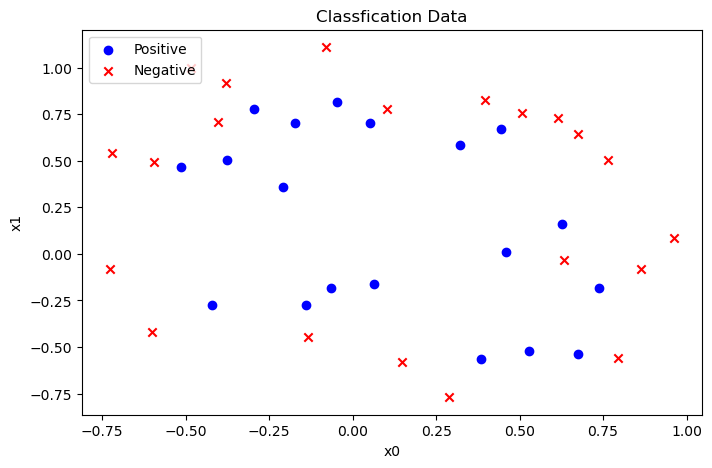

In [56]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_train_positive[:,0], X1_train_positive[:,1], marker='o', c='b', label="Positive")
ax1.scatter(X1_train_negative[:,0], X1_train_negative[:,1], marker='x', c='r', label="Negative")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

### Underfitting

In [57]:
degree = 1
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe1 = Pipeline(stepsLogisticsRegression)

losPipe1.fit(X1_train, np.ravel(y1_train))

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [58]:
losPipe1.score(X1_train, np.ravel(y1_train))

0.55

In [59]:
x_min, x_max = X1_train[:,0].min() - 1, X1_train[:,0].max() + 1
y_min, y_max = X1_train[:,1].min() - 1, X1_train[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.001)
x2grid = np.arange(y_min, y_max, 0.001)
xx, yy = np.meshgrid(x1grid,x2grid)
Z1 = losPipe1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

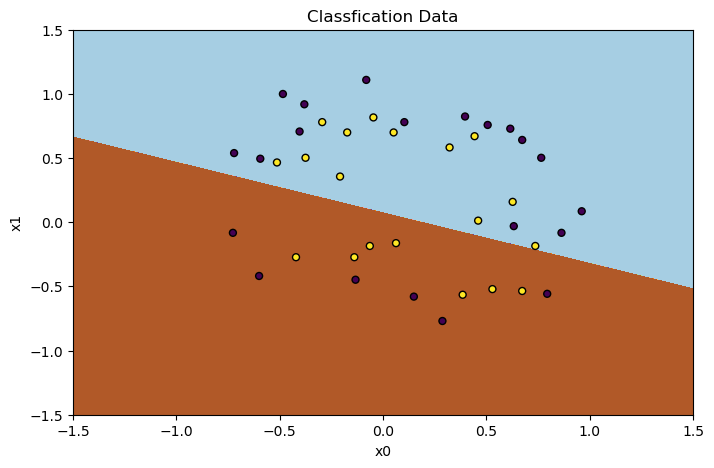

In [60]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z1, cmap=plt.cm.Paired)
plt.scatter(X1_train[:,0], X1_train[:,1], marker="o", c=y1_train, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [61]:
degree = 25
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=200000))
]

losPipe2 = Pipeline(stepsLogisticsRegression)

losPipe2.fit(X1_train, np.ravel(y1_train))

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=200000, penalty=None))])

In [62]:
losPipe2.score(X1_train, np.ravel(y1_train))

1.0

In [63]:
x_min, x_max = X1_train[:,0].min() - 1, X1_train[:,0].max() + 1
y_min, y_max = X1_train[:,1].min() - 1, X1_train[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z2 = losPipe2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

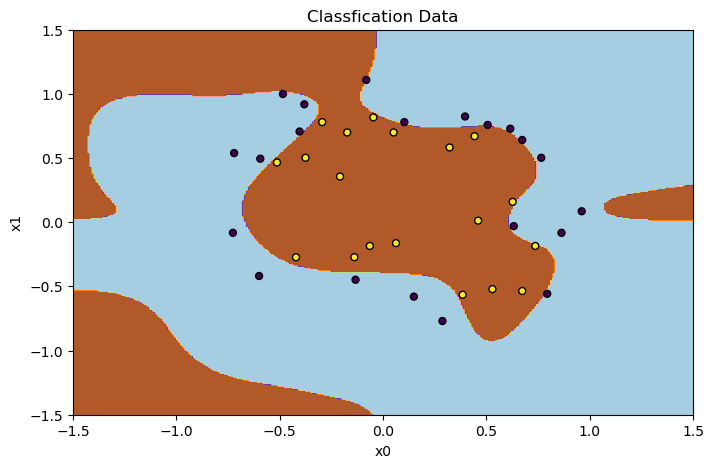

In [64]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z2, cmap=plt.cm.Paired)
plt.scatter(X1_train[:,0], X1_train[:,1], marker="o", c=y1_train, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

<div class='alert-block alert-info'> 

Please be aware that to achieve overfitting result, the types of solvers matters. For the example above, `lbfgs` return better performance than `sag` or `saga`.  Other solver were unable to converge.

How the data is scaled also affect the performance. If we use `MinMaxScaler()` with solver `lbfgs`, the solver could not converge. However, under  `lbfgs`, the solver could achieve best performance using `StandardScaler()`. 

**The rule of thumb is look at the data we have. If it is a Gaussian distribution use `StandardScaler()`.**

</div>

In [65]:
## The following code only return a 88% accuracy.
# stepsLogisticsRegression = [
#     ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
#     ('scaler', MinMaxScaler()),
#     ('model', LogisticRegression(penalty=None, solver='sag', max_iter=200000))
# ]

### Just Right Fitting

In [66]:
degree = 3
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=2000000))
]

losPipe3 = Pipeline(stepsLogisticsRegression)

losPipe3.fit(X1_train, np.ravel(y1_train))

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=2000000, penalty=None))])

In [67]:
losPipe3.score(X1_train, np.ravel(y1_train))

0.9

In [68]:
x_min, x_max = X1_train[:,0].min() - 1, X1_train[:,0].max() + 1
y_min, y_max = X1_train[:,1].min() - 1, X1_train[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z3 = losPipe3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

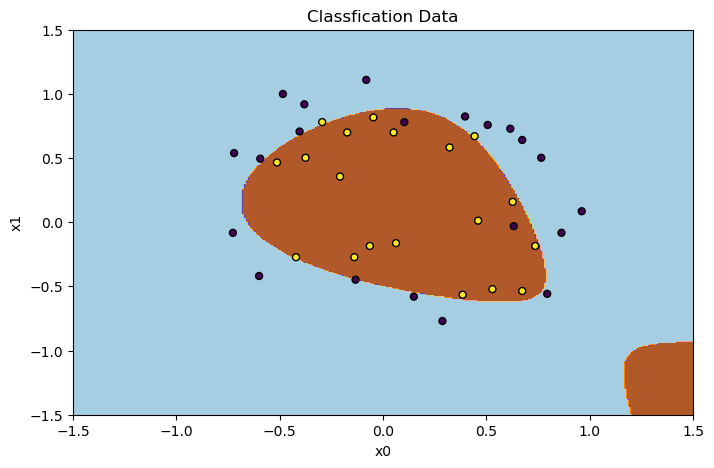

In [69]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z3, cmap=plt.cm.Paired)
plt.scatter(X1_train[:,0], X1_train[:,1], marker="o", c=y1_train, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Addressing Overfitting

Usually we can address overfitting by reducing the degree, in this case, we use regularization to reduce overfitting. In SciKit Learn, Logistic Regression, it has a default of L2 regularization penalty. In previous section we deliberately set the regularization to none. The control parameters of regularization is `C` where low `C` is high regularization and high `C` is low regularization.   

In [70]:
degree = 25
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C=10000, solver='lbfgs', max_iter=2000000))
]

losPipe4 = Pipeline(stepsLogisticsRegression)

losPipe4.fit(X1_train, np.ravel(y1_train))

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=10000, max_iter=2000000))])

In [71]:
losPipe4.score(X1_train, np.ravel(y1_train))

1.0

**The accuracy is the same as overfitting result. This confirm high C behaves like there is no regularization.**

In [72]:
x_min, x_max = X1_train[:,0].min() - 1, X1_train[:,0].max() + 1
y_min, y_max = X1_train[:,1].min() - 1, X1_train[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z4 = losPipe4.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = Z4.reshape(xx.shape)

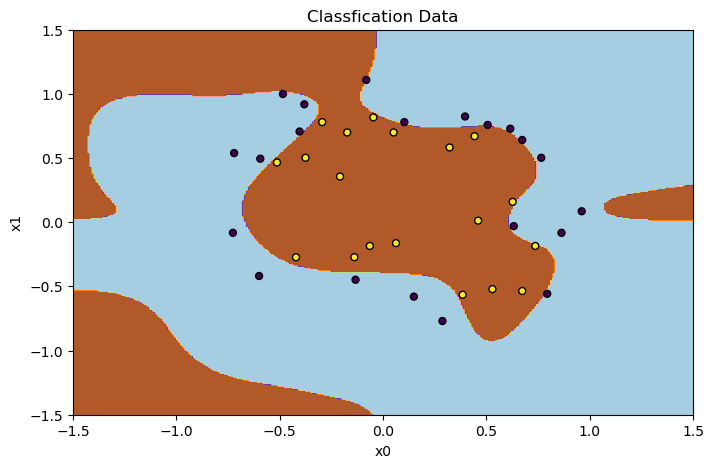

In [73]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z2, cmap=plt.cm.Paired)
plt.scatter(X1_train[:,0], X1_train[:,1], marker="o", c=y1_train, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

There is no change in the chart. Now, let us set `C=0.7` and see the results. The degrees will be remain high.

In [74]:
degree = 25
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C=0.7, solver='lbfgs', max_iter=2000000))
]

losPipe5 = Pipeline(stepsLogisticsRegression)

losPipe5.fit(X1_train, np.ravel(y1_train))

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.7, max_iter=2000000))])

In [75]:
losPipe5.score(X1_train, np.ravel(y1_train))

0.9

In [76]:
x_min, x_max = X1_train[:,0].min() - 1, X1_train[:,0].max() + 1
y_min, y_max = X1_train[:,1].min() - 1, X1_train[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z5 = losPipe5.predict(np.c_[xx.ravel(), yy.ravel()])
Z5 = Z5.reshape(xx.shape)

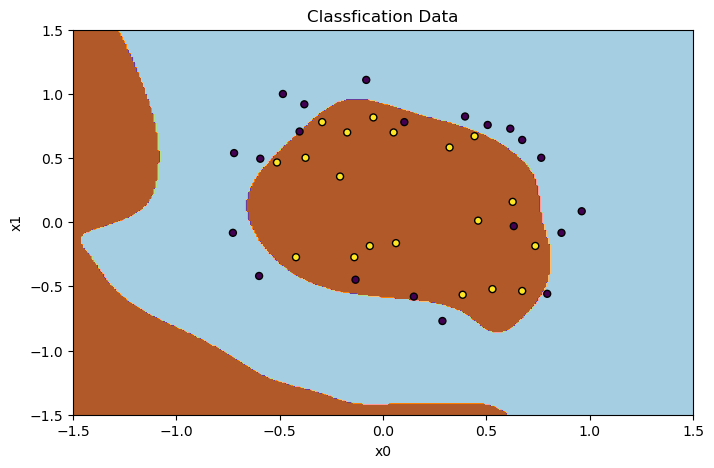

In [77]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z5, cmap=plt.cm.Paired)
plt.scatter(X1_train[:,0], X1_train[:,1], marker="o", c=y1_train, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

Accuracy drop to 90% which is similar to our result when using degree 3.

### Application of Logistic Gradient Descent on Example 1

#### Underfitting

In [78]:
degree = 1
polynomial_features1 = PolynomialFeatures(degree=degree, include_bias=False)
X1_poly1 = polynomial_features1.fit_transform(X1_train)

std_scaler1 = StandardScaler()
X1_norm1 = std_scaler1.fit_transform(X1_poly1)

In [79]:
initial_w = np.random.rand(X1_poly1.shape[1])-0.5
initial_b = 1.
lambdaRegu = 0.01                                          
iterations = 10000

In [80]:
coef1, intercept1, _, _, _ = compute_gradient_descent(X1_norm1, y1_train, gradient_function=compute_logistic_gradient, 
                                                      cost_function = compute_logistic_cost, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                                      printProgress=True, reguLambda=lambdaRegu)

iteration 0: cost = 8.3777e-01: intercept = 9.9755e-01: weights = [[-0.46029518 -0.33035821]]
iteration 1000: cost = 6.8487e-01: intercept = -1.6443e-03: weights = [[-0.14305603 -0.30153483]]
iteration 2000: cost = 6.8335e-01: intercept = -9.2929e-02: weights = [[-0.10259692 -0.27410047]]
iteration 3000: cost = 6.8333e-01: intercept = -1.0072e-01: weights = [[-0.09716969 -0.2692952 ]]
iteration 4000: cost = 6.8333e-01: intercept = -1.0138e-01: weights = [[-0.09638522 -0.26853776]]
iteration 5000: cost = 6.8333e-01: intercept = -1.0143e-01: weights = [[-0.09626827 -0.26842111]]
iteration 6000: cost = 6.8333e-01: intercept = -1.0144e-01: weights = [[-0.09625061 -0.26840326]]
iteration 7000: cost = 6.8333e-01: intercept = -1.0144e-01: weights = [[-0.09624793 -0.26840053]]
iteration 8000: cost = 6.8333e-01: intercept = -1.0144e-01: weights = [[-0.09624752 -0.26840012]]
iteration 9000: cost = 6.8333e-01: intercept = -1.0144e-01: weights = [[-0.09624746 -0.26840005]]
iteration 9999: cost = 6

In [81]:
#Compute accuracy on our training set
y_hat1 = predict_logistic(X1_norm1, coef1, intercept1)
print('Train Accuracy: %f'%(np.mean(y_hat1 == y1_train.reshape(-1,1)) * 100))

Train Accuracy: 55.000000


In [82]:
x_min, x_max = X1_train[:, 0].min() - 1, X1_train[:, 0].max() + 1
y_min, y_max = X1_train[:, 1].min() - 1, X1_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
#print(x1grid.shape)
#print(x2grid.shape)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
XX_poly = polynomial_features1.transform(np.c_[xx.ravel(), yy.ravel()])
#print(XX_poly.shape)
XX_norm = std_scaler1.transform(XX_poly)
#print('norm',XX_norm.shape)
ZG1 = predict_logistic(XX_norm, coef1, intercept1)
#print(Z4.shape)
#print(Z4[:5])
#print(Z4[-10:])
ZG1 = ZG1.reshape(xx.shape)
#print(Z4.shape)

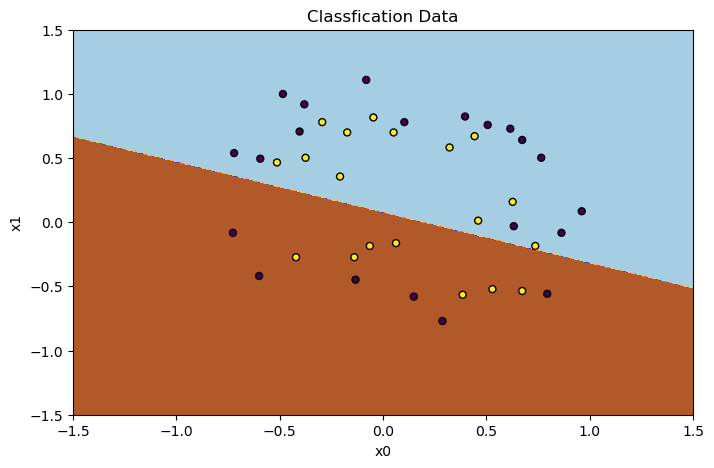

In [83]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG1, cmap=plt.cm.Paired)
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

#### Overfitting

In [84]:
degree = 25
polynomial_features2 = PolynomialFeatures(degree=degree, include_bias=False)
X1_poly2 = polynomial_features2.fit_transform(X1_train)

std_scaler2 = StandardScaler()
X1_norm2 = std_scaler2.fit_transform(X1_poly2)

In [85]:
random.seed(149)
initial_w = np.random.rand(X1_poly2.shape[1])-0.5
initial_b = 1.
lambdaRegu = 0 
alpha=0.01
iterations = 200000

In [86]:
startTime = datetime.now()
print(startTime)
coef2, intercept2, _, _, _ = compute_gradient_descent(X1_norm2, y1_train, gradient_function=compute_logistic_gradient, 
                                                      cost_function = compute_logistic_cost, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)
endTime = datetime.now()
print(endTime)
print('duration:', endTime - startTime )

2024-10-29 12:05:25.854413
iteration 199999: cost = 2.4621e-02: intercept = -2.2016e+00: weights = [-2.61912659e+00  5.95940085e+00 -1.14605422e+00 -1.41101527e+00
 -4.93803695e+00 -1.98892112e-01 -1.21523685e-01  3.37273228e+00
  1.70174063e+00 -3.33539807e+00  1.91391612e+00  4.20831379e+00
 -3.29926099e+00 -3.47966867e+00  9.90808214e-01  3.62194630e-01
  6.04582986e+00 -2.89711294e+00 -1.07829698e+00 -1.00153632e-01
 -2.14091133e+00 -7.90870529e-01  2.85671701e+00  1.20609170e+00
 -1.81233622e+00 -2.72819324e+00 -1.82644154e+00  1.17020906e+00
  9.78093056e-03  3.58730573e+00 -1.82043634e+00  3.50675473e+00
 -2.42745343e+00 -2.19794040e+00 -3.25015151e-02 -1.24618186e+00
 -1.19531578e+00  1.75276789e+00  2.18967199e-01 -6.14602401e-01
  1.84775045e+00 -1.17108235e+00 -2.63159548e+00 -9.40865825e-01
  1.26798978e+00 -2.93407542e-01  1.71584681e+00 -5.62318830e-01
  1.89052264e+00 -1.73231914e+00  2.13438142e+00 -7.77545096e-01
 -2.27973014e+00  2.84140408e-01 -4.63573763e-01 -1.6136

In [87]:
#Compute accuracy on our training set
y_hat2 = predict_logistic(X1_norm2, coef2, intercept2)
print('Train Accuracy: %f'%(np.mean(y_hat2 == y1_train.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [88]:
x_min, x_max = X1_train[:, 0].min() - 1, X1_train[:, 0].max() + 1
y_min, y_max = X1_train[:, 1].min() - 1, X1_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
#print(x1grid.shape)
#print(x2grid.shape)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
XX_poly = polynomial_features2.transform(np.c_[xx.ravel(), yy.ravel()])
#print(XX_poly.shape)
XX_norm = std_scaler2.transform(XX_poly)
#print('norm',XX_norm.shape)
ZG2 = predict_logistic(XX_norm, coef2, intercept2)
#print(Z4.shape)
#print(Z4[:5])
#print(Z4[-10:])
ZG2 = ZG2.reshape(xx.shape)
#print(Z4.shape)

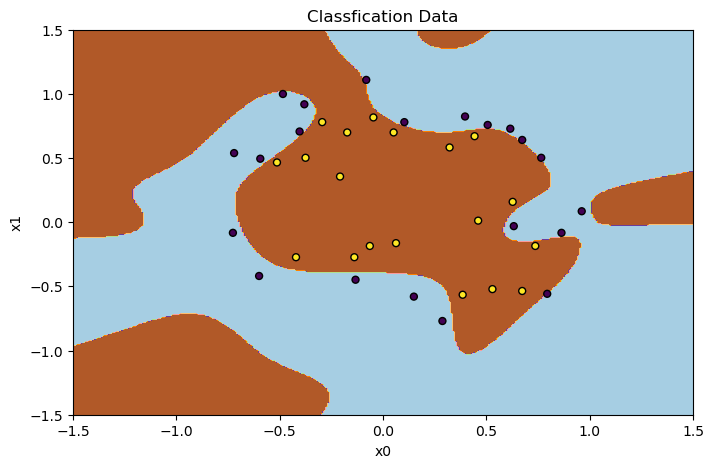

In [89]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG2, cmap=plt.cm.Paired)
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

#### Addressing Overfitting with Regularization

In [90]:
degree = 25
polynomial_features3 = PolynomialFeatures(degree=degree, include_bias=False)
X1_poly3 = polynomial_features3.fit_transform(X1_train)

std_scaler3 = StandardScaler()
X1_norm3 = std_scaler3.fit_transform(X1_poly3)

In [91]:
random.seed(149)
initial_w = np.random.rand(X1_poly3.shape[1])-0.5
initial_b = 1.
lambdaRegu = 1  
alpha = 0.01
iterations = 10000

In [92]:
coef3, intercept3, _, _, _ = compute_gradient_descent(X1_norm3, y1_train, gradient_function=compute_logistic_gradient, 
                                                      cost_function = compute_logistic_cost, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, reguLambda=lambdaRegu)

iteration 9999: cost = 3.3208e-01: intercept = -9.8445e-01: weights = [ 9.84533816e-02  8.49312742e-01 -3.56601718e-01 -2.08051230e-01
 -6.98246378e-01  3.03823217e-01 -7.05977683e-02  1.75655787e-01
  3.36389195e-01 -5.36177438e-01 -1.32433146e-01  1.29580100e-01
 -1.03678821e-01 -5.41244249e-01  1.42608602e-01 -1.07229080e-01
  6.11032191e-01 -1.78306180e-01 -1.52535200e-01  4.01862049e-02
 -3.77752944e-01 -1.29673347e-01  7.30300817e-02  1.02261226e-02
 -1.67049830e-01 -9.99393983e-02 -2.80968295e-01  4.56263907e-02
 -8.66576206e-02  3.62705256e-01 -2.33493090e-01  2.67984497e-01
 -1.38466778e-01 -2.34549715e-01 -2.22478552e-02 -2.40695892e-01
 -1.54396660e-01  1.67216027e-02 -3.08727943e-02 -9.57554763e-02
  9.34946703e-02 -2.43563032e-01 -1.30529516e-01 -2.24948577e-01
 -3.55621062e-02 -2.53664543e-02  2.03022260e-01 -1.90675791e-01
  2.62274319e-01 -2.12030526e-01  1.06505924e-01 -1.12822234e-01
 -2.26519684e-01 -4.85504993e-02 -1.86491332e-01 -6.51699455e-02
 -3.63431196e-02 -1.

In [93]:
#Compute accuracy on our training set
y_hat3 = predict_logistic(X1_norm3, coef3, intercept3)
print('Train Accuracy: %f'%(np.mean(y_hat3 == y1_train.reshape(-1,1)) * 100))

Train Accuracy: 90.000000


In [94]:
x_min, x_max = X1_train[:, 0].min() - 1, X1_train[:, 0].max() + 1
y_min, y_max = X1_train[:, 1].min() - 1, X1_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
#print(x1grid.shape)
#print(x2grid.shape)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
XX_poly = polynomial_features3.transform(np.c_[xx.ravel(), yy.ravel()])
#print(XX_poly.shape)
XX_norm = std_scaler3.transform(XX_poly)
#print('norm',XX_norm.shape)
ZG3 = predict_logistic(XX_norm, coef3, intercept3)
#print(Z4.shape)
#print(Z4[:5])
#print(Z4[-10:])
ZG3 = ZG3.reshape(xx.shape)
#print(Z4.shape)

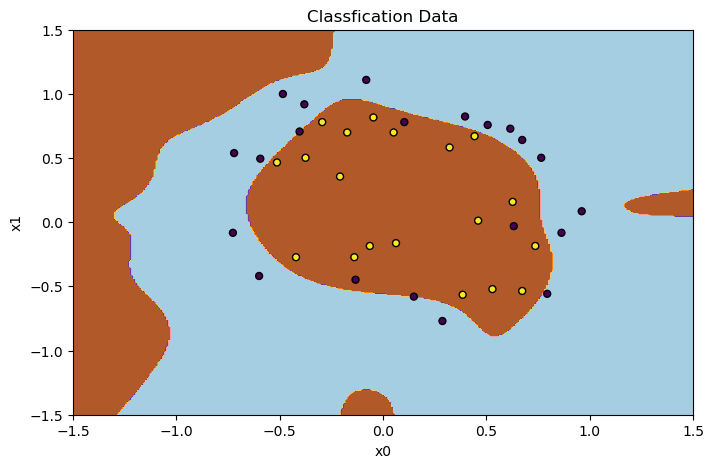

In [95]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG3, cmap=plt.cm.Paired)
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train, s=25, edgecolor='k')
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Application of Logistics Regression: Example 2

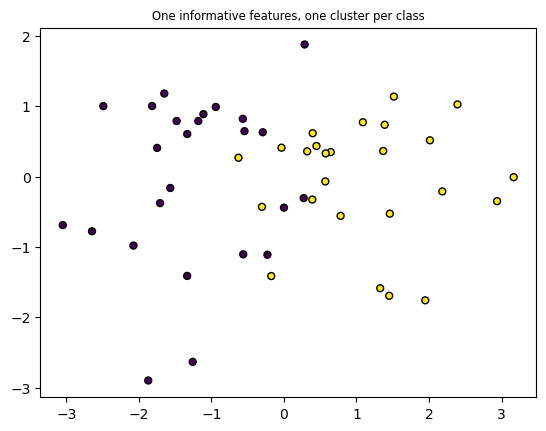

In [96]:
plt.title("One informative features, one cluster per class", fontsize="small")
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")
plt.show()

### Overfitting

In [97]:
degree = 25
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe6 = Pipeline(stepsLogisticsRegression)

losPipe6.fit(X2, Y2)

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [98]:
losPipe6.score(X2, Y2)

1.0

In [99]:
losPipe6['model'].intercept_

array([-3551.18316133])

In [100]:
x_min, x_max = X2[:,0].min() - 1, X2[:,0].max() + 1
y_min, y_max = X2[:,1].min() - 1, X2[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z6 = losPipe6.predict(np.c_[xx.ravel(), yy.ravel()])
Z6 = Z6.reshape(xx.shape)

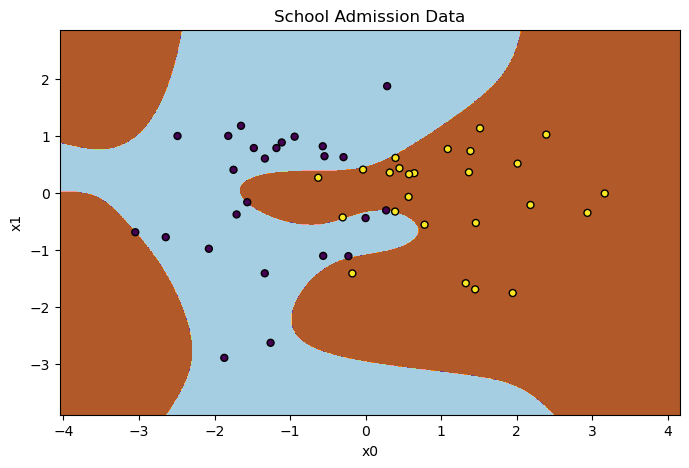

In [101]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z6, cmap=plt.cm.Paired)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=Y2, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Addressing Overfitting Problem

In [102]:
degree = 25
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=10000))
]

losPipe7 = Pipeline(stepsLogisticsRegression)

losPipe7.fit(X2, Y2)

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.01, max_iter=10000))])

In [103]:
losPipe7.score(X2, Y2)

0.86

In [104]:
x_min, x_max = X2[:,0].min() - 1, X2[:,0].max() + 1
y_min, y_max = X2[:,1].min() - 1, X2[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z7 = losPipe7.predict(np.c_[xx.ravel(), yy.ravel()])
Z7 = Z7.reshape(xx.shape)

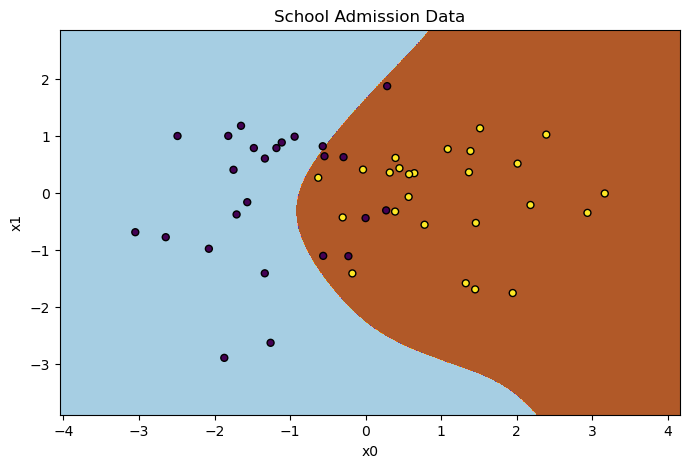

In [105]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z7, cmap=plt.cm.Paired)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=Y2, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of Logistic Gradient Descent on Example 2

#### Overfitting

In [106]:
degree = 25
polynomial_features4 = PolynomialFeatures(degree=degree, include_bias=False)
X2_poly4 = polynomial_features4.fit_transform(X2)

std_scaler4 = StandardScaler()
X2_norm4 = std_scaler4.fit_transform(X2_poly4)

In [107]:
random.seed(147)
initial_w = np.random.rand(X2_poly4.shape[1])-0.5
initial_b = 0.5
lambdaRegu = 0  
alpha = 0.1
iterations = 1500000

In [108]:
## This is a long process as we are trying to achieve over fitting
## Approx ~4 minutes

startTime = datetime.now()
print(startTime)

coef4, intercept4, _, _, _ = compute_gradient_descent(X2_norm4, Y2, gradient_function=compute_logistic_gradient, 
                                                      cost_function = compute_logistic_cost, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

endTime = datetime.now()
print(endTime)
print('duration:', endTime - startTime )

2024-10-29 12:06:45.932810
iteration 1499999: cost = 3.9979e-02: intercept = -1.5929e+00: weights = [-2.66037371e+00  6.91329811e+00  2.43344264e+01  1.97757477e+01
 -2.17544239e+01  5.64268929e+01 -1.06215635e+01  4.18017097e+01
 -4.72190688e+01 -2.25675414e+01 -2.27564882e+01 -2.90204502e+00
 -5.83767338e+00  1.79039350e+01  1.56784622e+01  4.59040777e+00
  9.61986511e+00  2.95075808e+00  5.90112745e+00 -1.60726756e+01
 -6.61283568e+00 -5.17751028e+00 -1.46079146e+00 -2.56887071e+00
 -2.61575786e+00 -2.36741404e+00  7.08777983e+00  4.11017615e+00
  2.15338806e+00  2.09973754e+00  7.92661201e-01  1.74238506e+00
  2.42371158e+00  1.80327292e+00 -3.64738462e+00 -1.78548646e+00
 -1.70241452e+00  7.48710122e-02 -6.95985931e-01 -4.59113203e-01
 -1.33070323e+00 -1.35929985e+00 -1.63188962e+00  5.60118036e-01
  1.16689981e+00  5.28151669e-01  2.05980324e-01 -4.25279988e-02
  3.04173586e-01  5.62804849e-01  8.33593971e-01  1.29190155e+00
  2.16788946e+00  5.64777343e-01  5.28277839e-01 -5.661

In [109]:
#Compute accuracy on our training set
y_hat4 = predict_logistic(X2_norm4, coef4, intercept4)
print('Train Accuracy: %f'%(np.mean(y_hat4 == Y2.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [110]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features4.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler4.transform(XX_poly)
ZG4 = predict_logistic(XX_norm, coef4, intercept4)
ZG4 = ZG4.reshape(xx.shape)

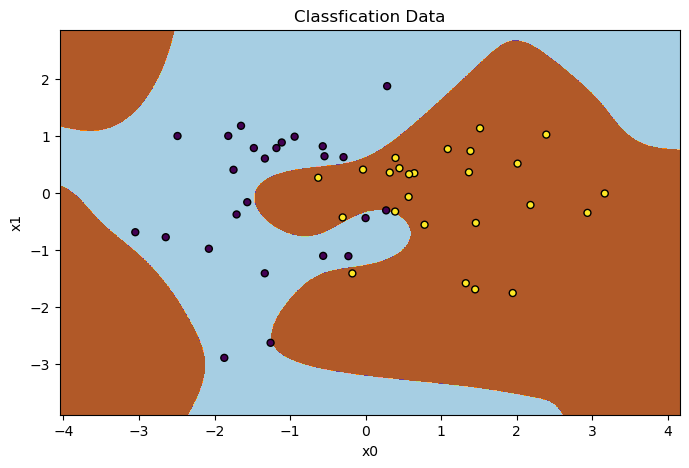

In [111]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG4, cmap=plt.cm.Paired)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

#### Addressing Overfitting

In [112]:
degree = 25
polynomial_features5 = PolynomialFeatures(degree=degree, include_bias=False)
X2_poly5 = polynomial_features5.fit_transform(X2)

std_scaler5 = StandardScaler()
X2_norm5 = std_scaler5.fit_transform(X2_poly5)

In [113]:
lambdaRegu = 100  
alpha = 0.1
iterations = 10000

In [114]:
coef5, intercept5, _, _, _ = compute_gradient_descent(X2_norm5, Y2, gradient_function=compute_logistic_gradient, 
                                                      cost_function = compute_logistic_cost, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 9999: cost = 5.9845e-01: intercept = -8.3667e-02: weights = [ 1.35392436e-01 -1.93296205e-02 -4.41709027e-03  5.64600211e-03
 -2.34645700e-02  7.01480122e-02 -8.52276633e-03  5.95852948e-02
 -7.68195202e-03  3.52490937e-03  5.28236833e-04 -5.59330428e-03
 -1.55926303e-02 -1.19382969e-02  3.91640193e-02 -1.42532880e-03
  4.92289446e-02 -2.27362277e-03  1.88882061e-02  2.56722376e-03
  6.34453183e-03 -2.32371856e-03 -4.10449931e-03 -8.70377846e-03
 -2.38399449e-03 -1.17114514e-02 -9.81621827e-03  2.60448586e-02
  1.33173873e-03  4.27145877e-02 -2.78418981e-03  1.40259538e-02
  2.18683694e-03  9.76438308e-03  5.91946078e-03  7.34925236e-03
 -4.28765153e-03 -5.40021985e-03 -4.76316191e-03  5.34471678e-05
 -6.58423943e-03 -3.37701984e-03 -8.15395553e-03 -8.51980322e-03
  1.98279252e-02  1.52599660e-03  3.44431892e-02 -1.86219137e-03
  1.18677314e-02  5.77312199e-05  6.11011479e-03  3.44301813e-03
  6.79882665e-03  6.52300450e-03  7.81202508e-03 -5.49732001e-03
 -5.97844192e-03 -2.

In [115]:
#Compute accuracy on our training set
y_hat5 = predict_logistic(X2_norm5, coef5, intercept5)
print('Train Accuracy: %f'%(np.mean(y_hat5 == Y2.reshape(-1,1)) * 100))

Train Accuracy: 86.000000


In [116]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features5.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler5.transform(XX_poly)
ZG5 = predict_logistic(XX_norm, coef5, intercept5)
ZG5 = ZG5.reshape(xx.shape)

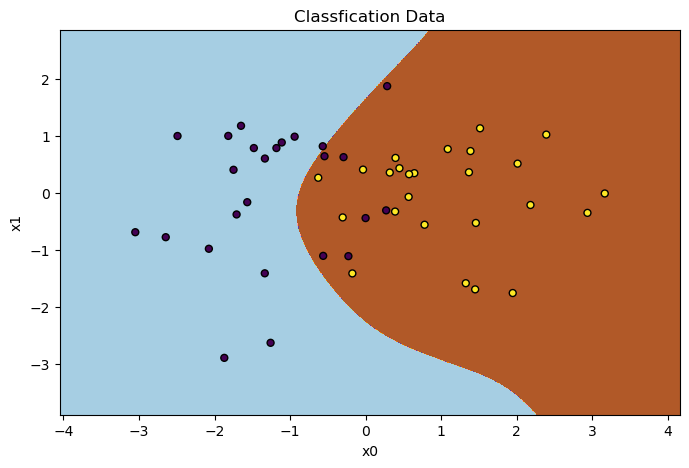

In [117]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG5, cmap=plt.cm.Paired)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Example 3: School Admission Data on Fitting Problem

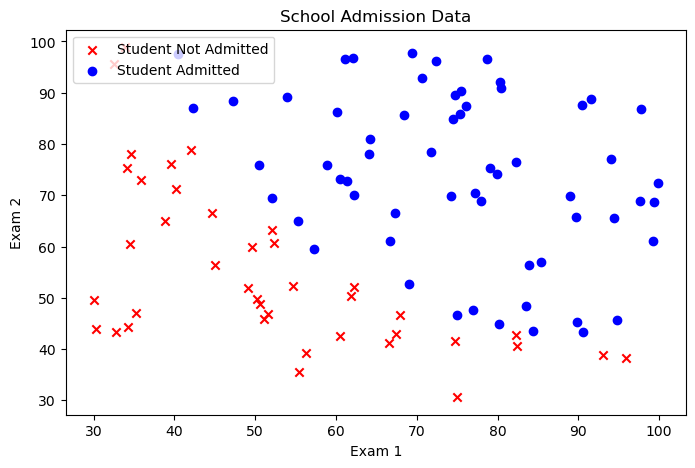

In [118]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3_train_NotAdmitted[:,0], X3_train_NotAdmitted[:,1], marker='x', c='r', label="Student Not Admitted")
ax1.scatter(X3_train_admitted[:,0], X3_train_admitted[:,1], marker='o', c='b', label="Student Admitted")
ax1.set_title('School Admission Data')
ax1.set_xlabel('Exam 1')
ax1.set_ylabel('Exam 2')
ax1.legend(loc="upper left")
plt.show()

In [119]:
X3_train.shape

(100, 2)

In [120]:
y3_train.shape

(100, 1)

### Underfitting

In [121]:
degree = 1
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe8 = Pipeline(stepsLogisticsRegression)

losPipe8.fit(X3_train, np.ravel(y3_train))

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [122]:
losPipe8.score(X3_train, np.ravel(y3_train))

0.89

In [123]:
x_min, x_max = X3_train[:, 0].min() - 1, X3_train[:, 0].max() + 1
y_min, y_max = X3_train[:, 1].min() - 1, X3_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.1)
x2grid = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x1grid,x2grid)
Z8 = losPipe8.predict(np.c_[xx.ravel(), yy.ravel()])
Z8 = Z8.reshape(xx.shape)

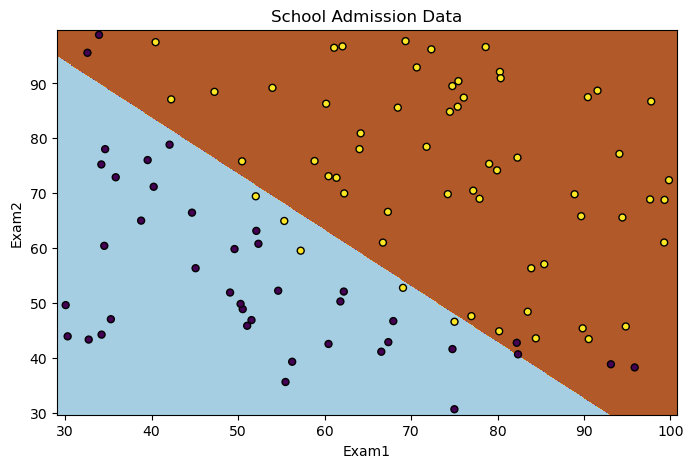

In [124]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z8, cmap=plt.cm.Paired)
plt.scatter(X3_train[:, 0], X3_train[:, 1], marker="o", c=y3_train, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('Exam1')
ax1.set_ylabel('Exam2')
plt.show()

### Overfitting

In [125]:
degree = 25
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=2000000))
]

losPipe9 = Pipeline(stepsLogisticsRegression)

losPipe9.fit(X3_train, np.ravel(y3_train))

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(max_iter=2000000, penalty=None))])

In [126]:
losPipe9.score(X3_train, np.ravel(y3_train))

1.0

In [127]:
x_min, x_max = X3_train[:, 0].min() - 1, X3_train[:, 0].max() + 1
y_min, y_max = X3_train[:, 1].min() - 1, X3_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.1)
x2grid = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x1grid,x2grid)
Z9 = losPipe9.predict(np.c_[xx.ravel(), yy.ravel()])
Z9 = Z9.reshape(xx.shape)

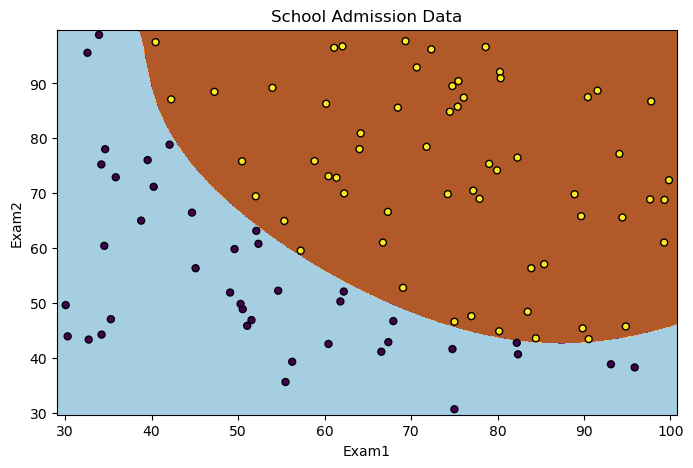

In [128]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z9, cmap=plt.cm.Paired)
plt.scatter(X3_train[:, 0], X3_train[:, 1], marker="o", c=y3_train, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('Exam1')
ax1.set_ylabel('Exam2')
plt.show()

### Addressing Overfitting

In [129]:
degree = 25
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(solver='lbfgs', max_iter=2000000))
]

losPipe10 = Pipeline(stepsLogisticsRegression)

losPipe10.fit(X3_train, np.ravel(y3_train))

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(max_iter=2000000))])

In [130]:
losPipe10.score(X3_train, np.ravel(y3_train))

0.92

In [131]:
x_min, x_max = X3_train[:, 0].min() - 1, X3_train[:, 0].max() + 1
y_min, y_max = X3_train[:, 1].min() - 1, X3_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.1)
x2grid = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x1grid,x2grid)
Z10 = losPipe10.predict(np.c_[xx.ravel(), yy.ravel()])
Z10 = Z10.reshape(xx.shape)

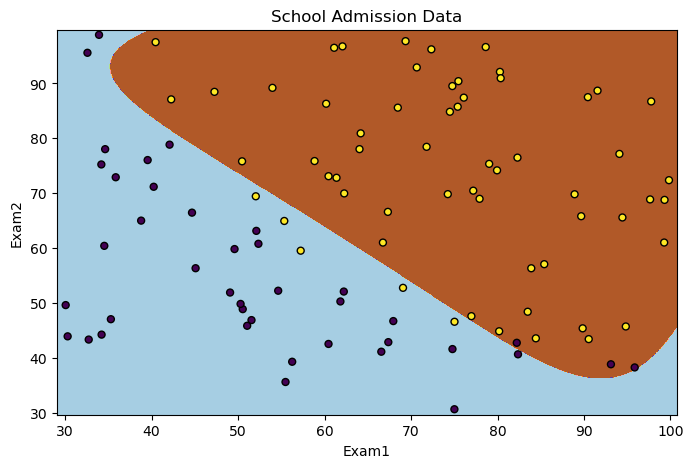

In [132]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z10, cmap=plt.cm.Paired)
plt.scatter(X3_train[:, 0], X3_train[:, 1], marker="o", c=y3_train, s=25, edgecolor='k')
ax1.set_title('School Admission Data')
ax1.set_xlabel('Exam1')
ax1.set_ylabel('Exam2')
plt.show()

### Application of Logistic Gradient Descent on Example 3 School Data

### Underfitting

In [133]:
degree = 1
polynomial_features6 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly6 = polynomial_features6.fit_transform(X3_train)

std_scaler6 = StandardScaler()
X3_norm6 = std_scaler6.fit_transform(X3_poly6)

In [134]:
lambdaRegu = 0 
alpha = 0.01
iterations = 20000

In [135]:
coef6, intercept6, _, _, _ = compute_gradient_descent(X3_norm6, y3_train, gradient_function=compute_logistic_gradient, 
                                                      cost_function = compute_logistic_cost, iterations=iterations, 
                                                      alpha=alpha, reguLambda=lambdaRegu)

iteration 19999: cost = 2.0492e-01: intercept = 1.5052e+00: weights = [3.53998324 3.28717456]
best w [3.54   3.2872]
best b 1.5052


In [136]:
#Compute accuracy on our training set
y_hat6 = predict_logistic(X3_norm6, coef6, intercept6)
print('Train Accuracy: %f'%(np.mean(y_hat6 == y3_train.reshape(-1,1)) * 100))

Train Accuracy: 89.000000


In [137]:
x_min, x_max = X3_train[:, 0].min() - 1, X3_train[:, 0].max() + 1
y_min, y_max = X3_train[:, 1].min() - 1, X3_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.1)
x2grid = np.arange(y_min, y_max, 0.1)
#print(x1grid.shape)
#print(x2grid.shape)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
XX_poly = polynomial_features6.transform(np.c_[xx.ravel(), yy.ravel()])
#print(XX_poly.shape)
XX_norm = std_scaler6.transform(XX_poly)
#print('norm',XX_norm.shape)
ZG6 = predict_logistic(XX_norm, coef6, intercept6)
#print(Z4.shape)
#print(Z4[:5])
#print(Z4[-10:])
ZG6 = ZG6.reshape(xx.shape)
#print(Z4.shape)

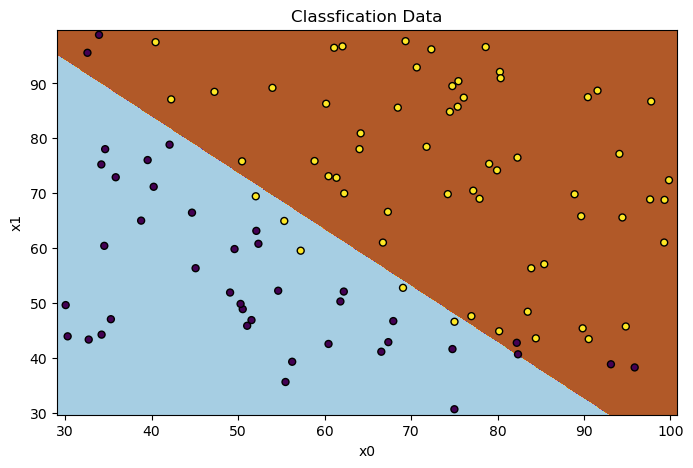

In [138]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG6, cmap=plt.cm.Paired)
plt.scatter(X3_train[:, 0], X3_train[:, 1], marker="o", c=y3_train, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [139]:
degree = 25
polynomial_features7 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly7 = polynomial_features7.fit_transform(X3_train)

std_scaler7 = StandardScaler()
X3_norm7 = std_scaler7.fit_transform(X3_poly7)

In [140]:
random.seed(147)
initial_w = np.random.rand(X3_poly7.shape[1])-0.5
initial_b = 0.5
lambdaRegu = 0  
alpha = 0.1
iterations = 50000

In [141]:
coef7, intercept7, _, _, _ = compute_gradient_descent(X3_norm7, y3_train, gradient_function=compute_logistic_gradient, 
                                                      cost_function = compute_logistic_cost, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 49999: cost = 1.9700e-02: intercept = 9.2616e+00: weights = [ 4.60215294e+00  4.32923545e+00  2.11470794e+00  7.86113457e+00
  1.47116958e+00 -4.23557647e-01  5.52121772e+00  4.84320170e+00
 -2.82513350e-01 -1.66145749e+00  3.47971044e+00  4.63501255e+00
  3.11054951e+00 -1.03226220e+00 -1.80083182e+00  1.59329588e+00
  3.22148035e+00  2.30409060e+00  1.28108510e+00 -8.01019144e-01
 -2.00516880e+00  1.61259403e-01  2.08119913e+00  1.49404758e+00
  1.11640045e+00  5.38045668e-01 -1.15698405e+00 -1.55741262e+00
  1.40515576e-02  1.24098077e+00  1.54501285e+00  7.06860662e-01
 -3.43114124e-02 -7.73919881e-02 -1.10007291e+00 -2.01080133e+00
 -2.46644129e-01 -1.12131331e-01  2.32950967e-01  6.76745277e-01
 -3.86218030e-01 -3.75968149e-01 -8.91563301e-01 -2.56939272e-01
 -1.21752239e+00 -5.97355680e-01  4.69197411e-01  1.28205709e-01
 -4.71689147e-02 -1.13705206e-01 -6.00764121e-01 -6.04583188e-01
 -4.86542058e-01 -7.16542855e-01 -8.68233738e-01 -1.43574472e-01
 -5.31611753e-01  3.

In [142]:
#Compute accuracy on our training set
y_hat7 = predict_logistic(X3_norm7, coef7, intercept7)
print('Train Accuracy: %f'%(np.mean(y_hat7 == y3_train.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [143]:
x_min, x_max = X3_train[:, 0].min() - 1, X3_train[:, 0].max() + 1
y_min, y_max = X3_train[:, 1].min() - 1, X3_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.1)
x2grid = np.arange(y_min, y_max, 0.1)
#print(x1grid.shape)
#print(x2grid.shape)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
XX_poly = polynomial_features7.transform(np.c_[xx.ravel(), yy.ravel()])
#print(XX_poly.shape)
XX_norm = std_scaler7.transform(XX_poly)
#print('norm',XX_norm.shape)
ZG7 = predict_logistic(XX_norm, coef7, intercept7)
#print(Z4.shape)
#print(Z4[:5])
#print(Z4[-10:])
ZG7 = ZG7.reshape(xx.shape)
#print(Z4.shape)

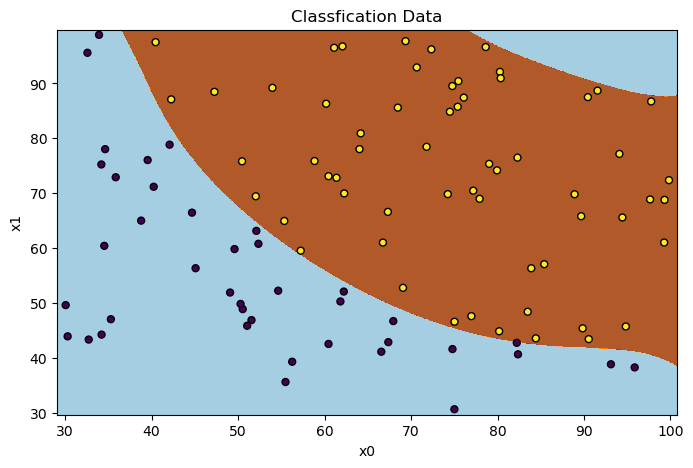

In [144]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG7, cmap=plt.cm.Paired)
plt.scatter(X3_train[:, 0], X3_train[:, 1], marker="o", c=y3_train, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Address Overfitting

In [145]:
degree = 25
polynomial_features8 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly8 = polynomial_features8.fit_transform(X3_train)

std_scaler8 = StandardScaler()
X3_norm8 = std_scaler8.fit_transform(X3_poly8)

In [146]:
random.seed(147)
initial_w = np.random.rand(X3_poly8.shape[1])-0.5
initial_b = 0.5
lambdaRegu = 25  
alpha = 0.1
iterations = 20000

In [147]:
coef8, intercept8, _, _, _ = compute_gradient_descent(X3_norm8, y3_train, gradient_function=compute_logistic_gradient, 
                                                      cost_function = compute_logistic_cost, init_intercept=initial_b, 
                                                      init_coefficient=initial_w, iterations=iterations, alpha=alpha, 
                                                      reguLambda=lambdaRegu)

iteration 19999: cost = 3.0976e-01: intercept = 2.3068e+00: weights = [ 1.72805975e-01  1.35872462e-01  1.35064100e-01  2.19043272e-01
  1.06161628e-01  1.00216517e-01  1.78857568e-01  1.71963059e-01
  8.03024866e-02  7.06812633e-02  1.35937810e-01  1.57882407e-01
  1.31024495e-01  5.88404682e-02  4.68402914e-02  1.00696055e-01
  1.27072244e-01  1.26618980e-01  1.00061768e-01  4.15476173e-02
  2.80577068e-02  7.33128771e-02  9.77698534e-02  1.05404535e-01
  9.94728388e-02  7.67788517e-02  2.78034523e-02  1.34034331e-02
  5.24948580e-02  7.38326429e-02  8.29341524e-02  8.42282594e-02
  7.81581781e-02  5.91873486e-02  1.68905258e-02  1.99326554e-03
  3.67689272e-02  5.53428262e-02  6.37628149e-02  6.69383210e-02
  6.68068087e-02  6.18887461e-02  4.57720875e-02  8.15620943e-03
 -6.90177866e-03  2.48618937e-02  4.13673999e-02  4.86820433e-02
  5.17934556e-02  5.32447517e-02  5.32791083e-02  4.95298928e-02
  3.54049610e-02  1.07087266e-03 -1.38476662e-02  1.57852421e-02
  3.08523517e-02  3.

In [148]:
#Compute accuracy on our training set
y_hat8 = predict_logistic(X3_norm8, coef8, intercept8)
print('Train Accuracy: %f'%(np.mean(y_hat8 == y3_train.reshape(-1,1)) * 100))

Train Accuracy: 92.000000


In [149]:
x_min, x_max = X3_train[:, 0].min() - 1, X3_train[:, 0].max() + 1
y_min, y_max = X3_train[:, 1].min() - 1, X3_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.1)
x2grid = np.arange(y_min, y_max, 0.1)
#print(x1grid.shape)
#print(x2grid.shape)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
XX_poly = polynomial_features8.transform(np.c_[xx.ravel(), yy.ravel()])
#print(XX_poly.shape)
XX_norm = std_scaler8.transform(XX_poly)
#print('norm',XX_norm.shape)
ZG8 = predict_logistic(XX_norm, coef8, intercept8)
#print(Z4.shape)
#print(Z4[:5])
#print(Z4[-10:])
ZG8 = ZG8.reshape(xx.shape)
#print(Z4.shape)

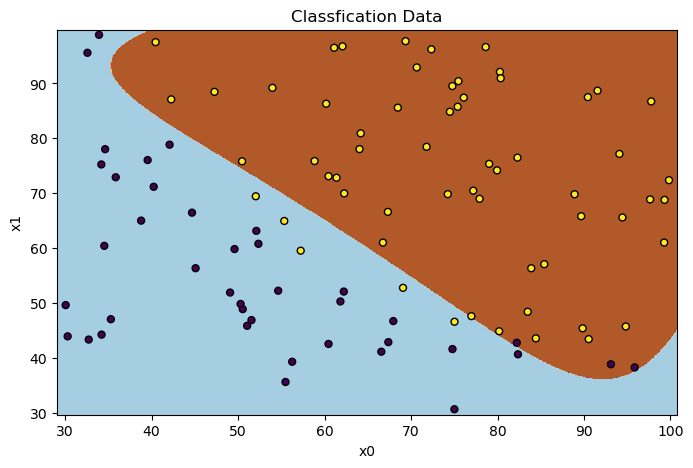

In [150]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG8, cmap=plt.cm.Paired)
plt.scatter(X3_train[:, 0], X3_train[:, 1], marker="o", c=y3_train, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## End